# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [11]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [19]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.31MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 165kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.77MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [20]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [21]:
model = torch.nn.Linear(28*28, 10)

In [22]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.7976,  0.5289,  0.8230, -0.5918,  0.5389, -0.7732, -0.0448, -0.0706,
         -0.4803,  0.5226]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [23]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [24]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [25]:
print('Final loss:', loss.data)

Final loss: tensor(0.3818)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

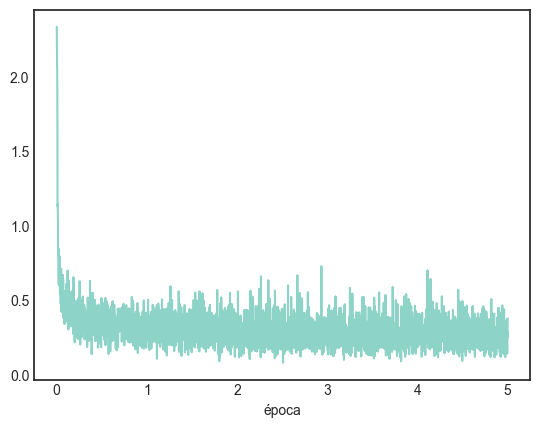

In [26]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

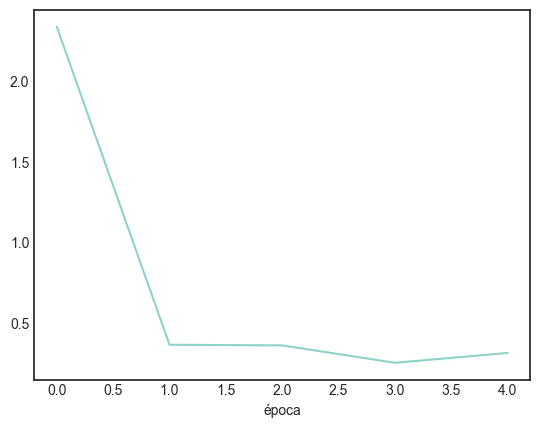

In [27]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
    > O tamanho do mini-batch é 100 

2. Em uma época, quantos mini-batches existem?
    > Existem 600 mini-batches em uma época, pois o conjunto de treinamento do MNIST possui 60.000 amostras e com um tamanho de mini-batch de 100, temos 60.000 / 100 = 600 mini-batches por época.

3. Qual é a definição de época?
    > Uma época é definida como uma passagem completa por todo o conjunto de dados de treinamento. Durante uma época, cada amostra do conjunto de treinamento é utilizada exatamente uma vez para atualizar os parâmetros do modelo.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)

        loss = criterion(outputs, Variable(y_train))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{len(loader_train)}, loss: {loss.item():.4f}")

print("\nFinal loss:", loss.data)

Época: 1/5, batch: 1/600, loss: 0.2125
Época: 1/5, batch: 2/600, loss: 0.3276
Época: 1/5, batch: 3/600, loss: 0.3454
Época: 1/5, batch: 4/600, loss: 0.1899
Época: 1/5, batch: 5/600, loss: 0.2167
Época: 1/5, batch: 6/600, loss: 0.1426
Época: 1/5, batch: 7/600, loss: 0.2387
Época: 1/5, batch: 8/600, loss: 0.3488
Época: 1/5, batch: 9/600, loss: 0.1697
Época: 1/5, batch: 10/600, loss: 0.3167
Época: 1/5, batch: 11/600, loss: 0.1557
Época: 1/5, batch: 12/600, loss: 0.2199
Época: 1/5, batch: 13/600, loss: 0.1599
Época: 1/5, batch: 14/600, loss: 0.4086
Época: 1/5, batch: 15/600, loss: 0.1853
Época: 1/5, batch: 16/600, loss: 0.3699
Época: 1/5, batch: 17/600, loss: 0.3401
Época: 1/5, batch: 18/600, loss: 0.1185
Época: 1/5, batch: 19/600, loss: 0.3275
Época: 1/5, batch: 20/600, loss: 0.2878
Época: 1/5, batch: 21/600, loss: 0.2116
Época: 1/5, batch: 22/600, loss: 0.2263
Época: 1/5, batch: 23/600, loss: 0.3065
Época: 1/5, batch: 24/600, loss: 0.2883
Época: 1/5, batch: 25/600, loss: 0.1994
Época: 1/

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [29]:
batch_sizes_to_test = [20, 50, 100, 200]
results = {}

for bs in batch_sizes_to_test:
    print(f"\nTreinando com batch_size = {bs}")
    
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)
    model = torch.nn.Linear(28*28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    losses_exp = []
    epochs_exp = []
    total_trained_samples = 0
    n_batches_train = len(loader_train)

    for i in range(n_epochs):
        for k,(x_train, y_train) in enumerate(loader_train):
            inputs = x_train.view(-1, 28*28)
            outputs = model(inputs)

            loss = criterion(outputs, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs_exp.append(total_trained_samples / total_samples)
            losses_exp.append(loss.item())

    results[bs] = (epochs_exp, losses_exp)


Treinando com batch_size = 20

Treinando com batch_size = 50

Treinando com batch_size = 100

Treinando com batch_size = 200


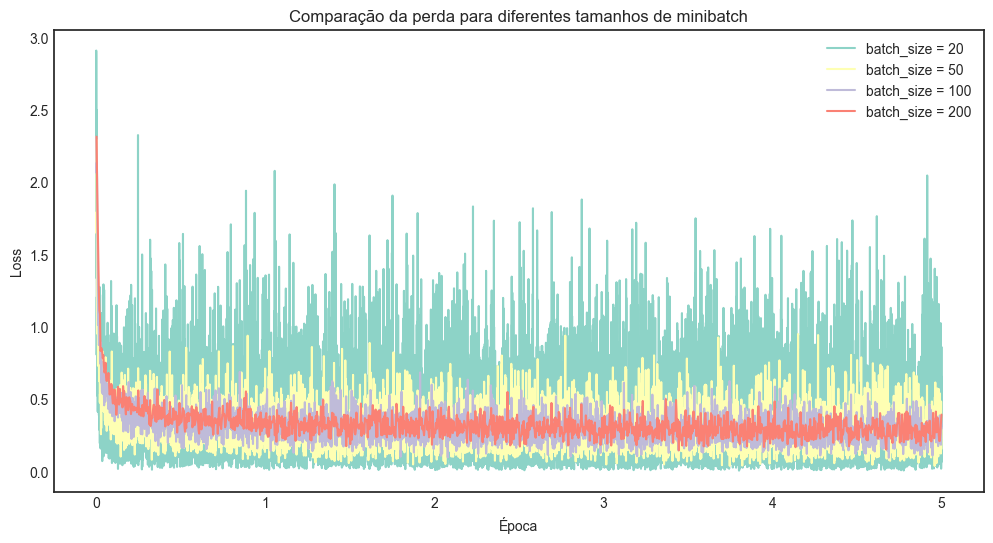

In [30]:
plt.figure(figsize=(12,6))

for bs in batch_sizes_to_test:
    epochs_exp, losses_exp = results[bs]
    plt.plot(epochs_exp, losses_exp, label=f"batch_size = {bs}")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Comparação da perda para diferentes tamanhos de minibatch")
plt.legend()
plt.show()

## Conclusões sobre os experimentos deste notebook


- O tamanho do minibatch influencia diretamente a estabilidade e a velocidade do treinamento.

- Minibatches pequenos, como 20, produzem perda mais ruidosa, mas podem convergir mais rápido inicialmente.

- Minibatches médios, por exemplo, entre 50 e 100, tendem a produzir um bom equilíbrio entre estabilidade e velocidade.

- Minibatches grandes, como 200, tornam o gradiente mais estável, mas podem reduzir a capacidade de generalização.